<a href="https://colab.research.google.com/github/jblancoperez/fiap-desafio/blob/main/C%C3%B3pia_de_00_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sys
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score, cross_validate


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

import multicol
import generator



#!{sys.executable} -m pip install -U pandas-profiling[notebook]
#!jupyter nbextension enable --py widgetsnbextension

#!{sys.executable} -m pip install -U lafrom lazypredict.Supervised import LazyClassifier, LazyRegressor

def cm_to_inch(value):
    return value/2.54
#arquivo = pd.read_csv('https://raw.githubusercontent.com/jblancoperez/fiap-desafio/main/solicitacoescredito.csv')

In [17]:
#(input_width, label_width, shift,
#             train_df=train_df, val_df=val_df, test_df=test_df,
#            label_columns=None):

df=arquivo = pd.read_csv('./solicitacoescredito.csv')
df=df.loc[df['valorAprovado']>0]


df['dataAprovado'] = np.where(df['status'] == 'AprovadoAnalista', df['dataAprovadoNivelAnalista'], df['dataAprovadoEmComite'])






/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


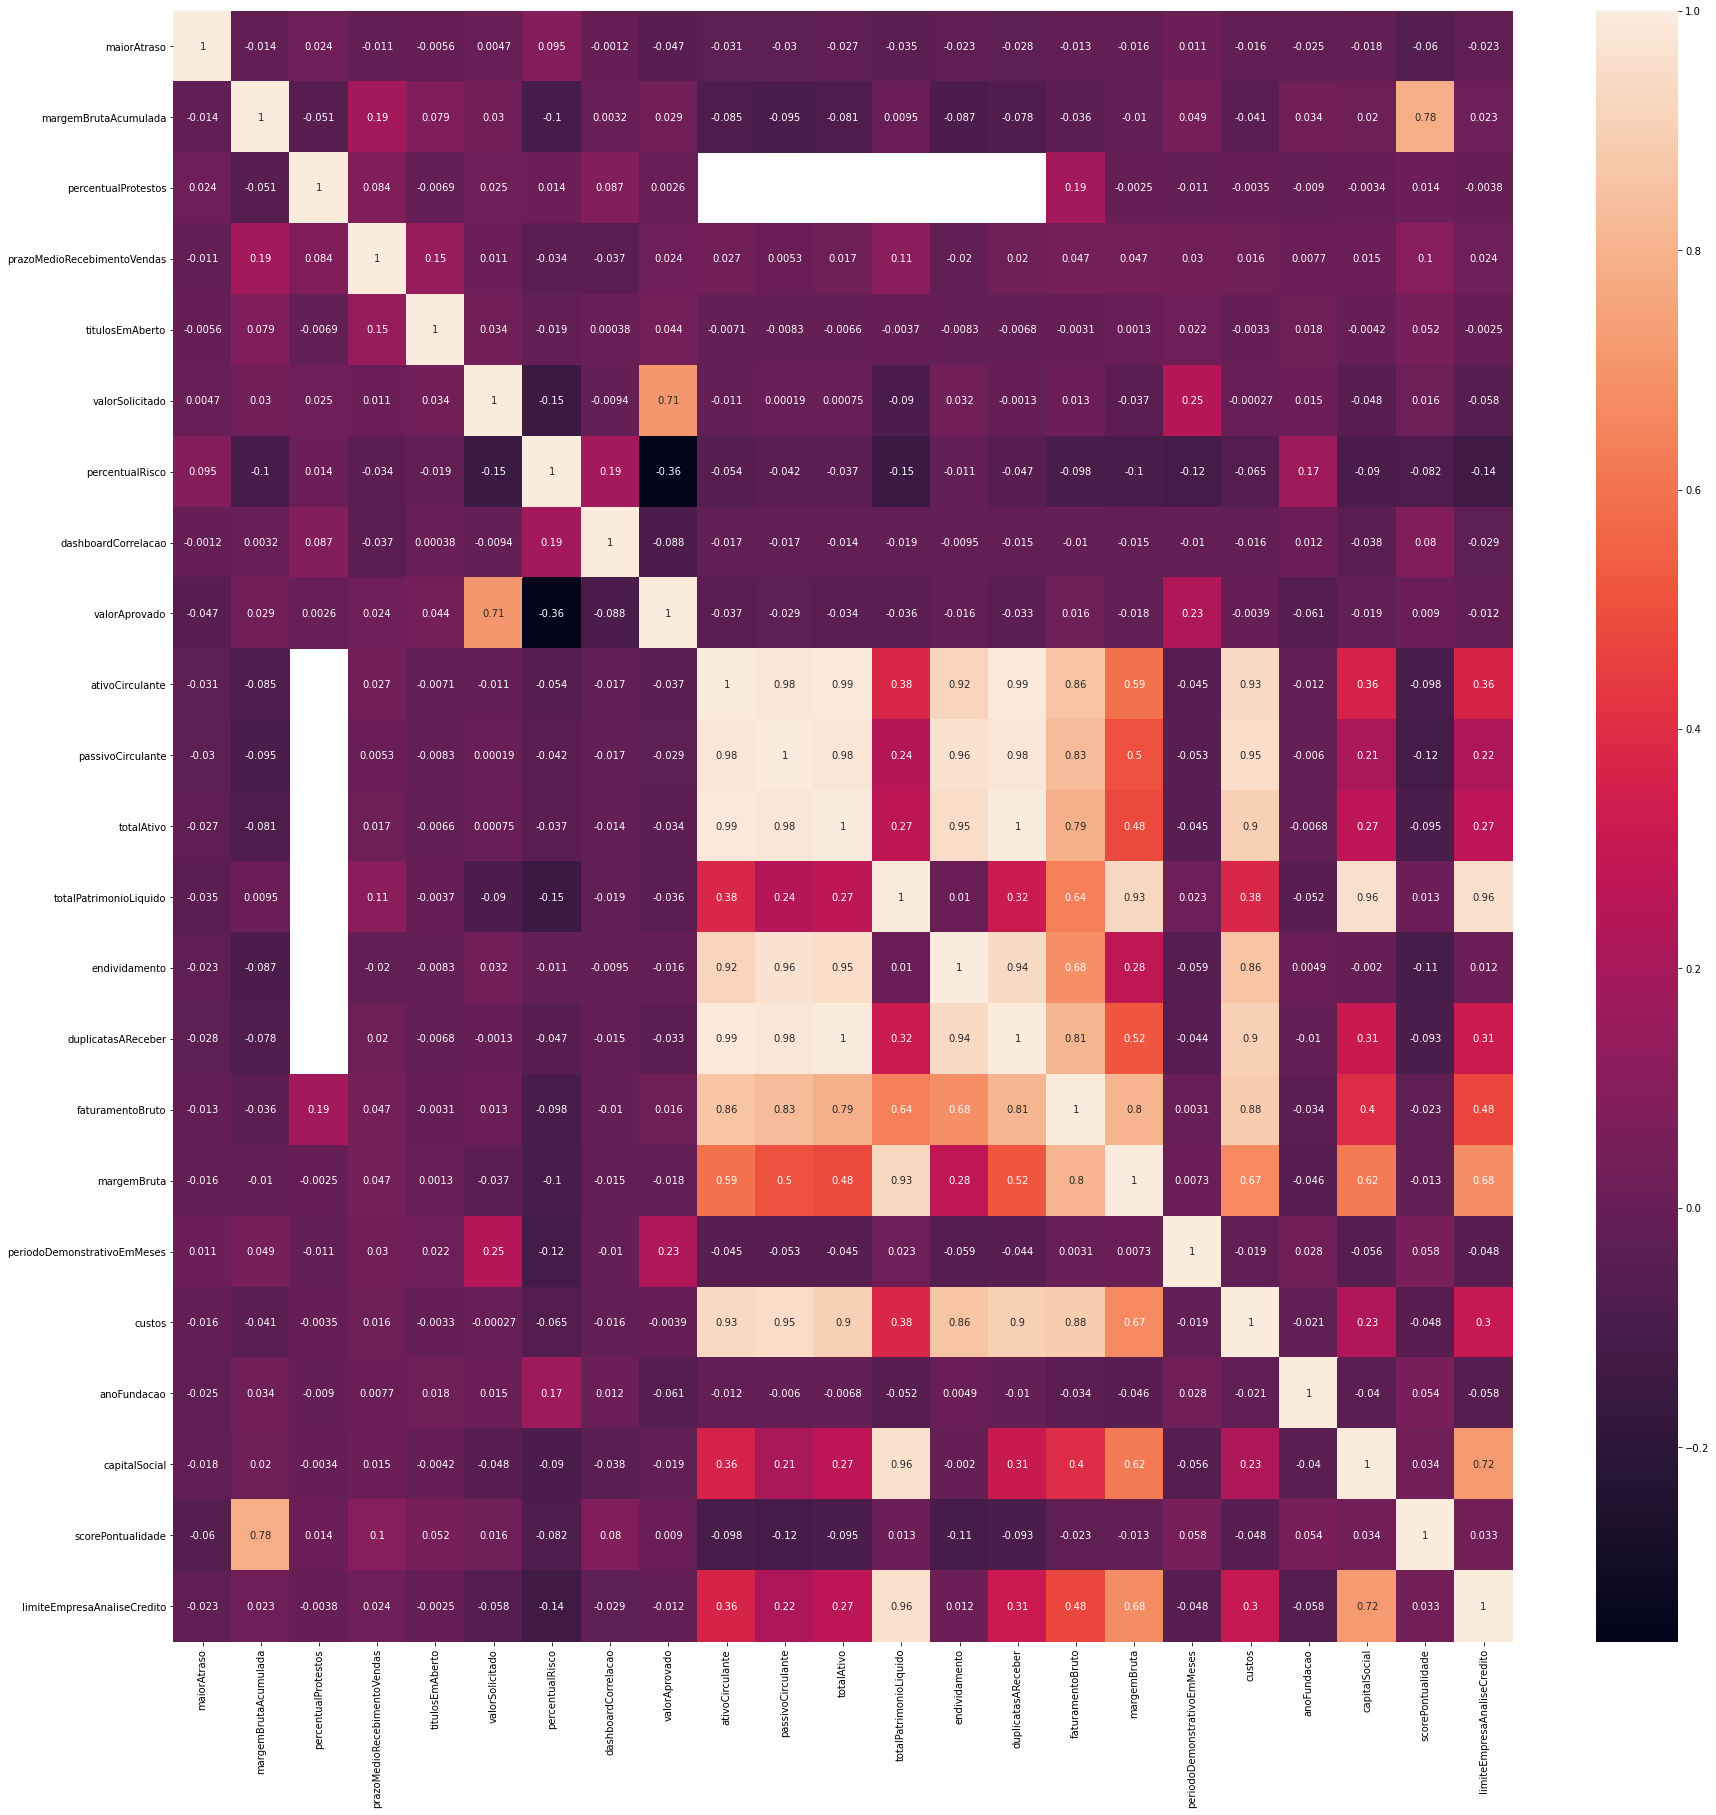

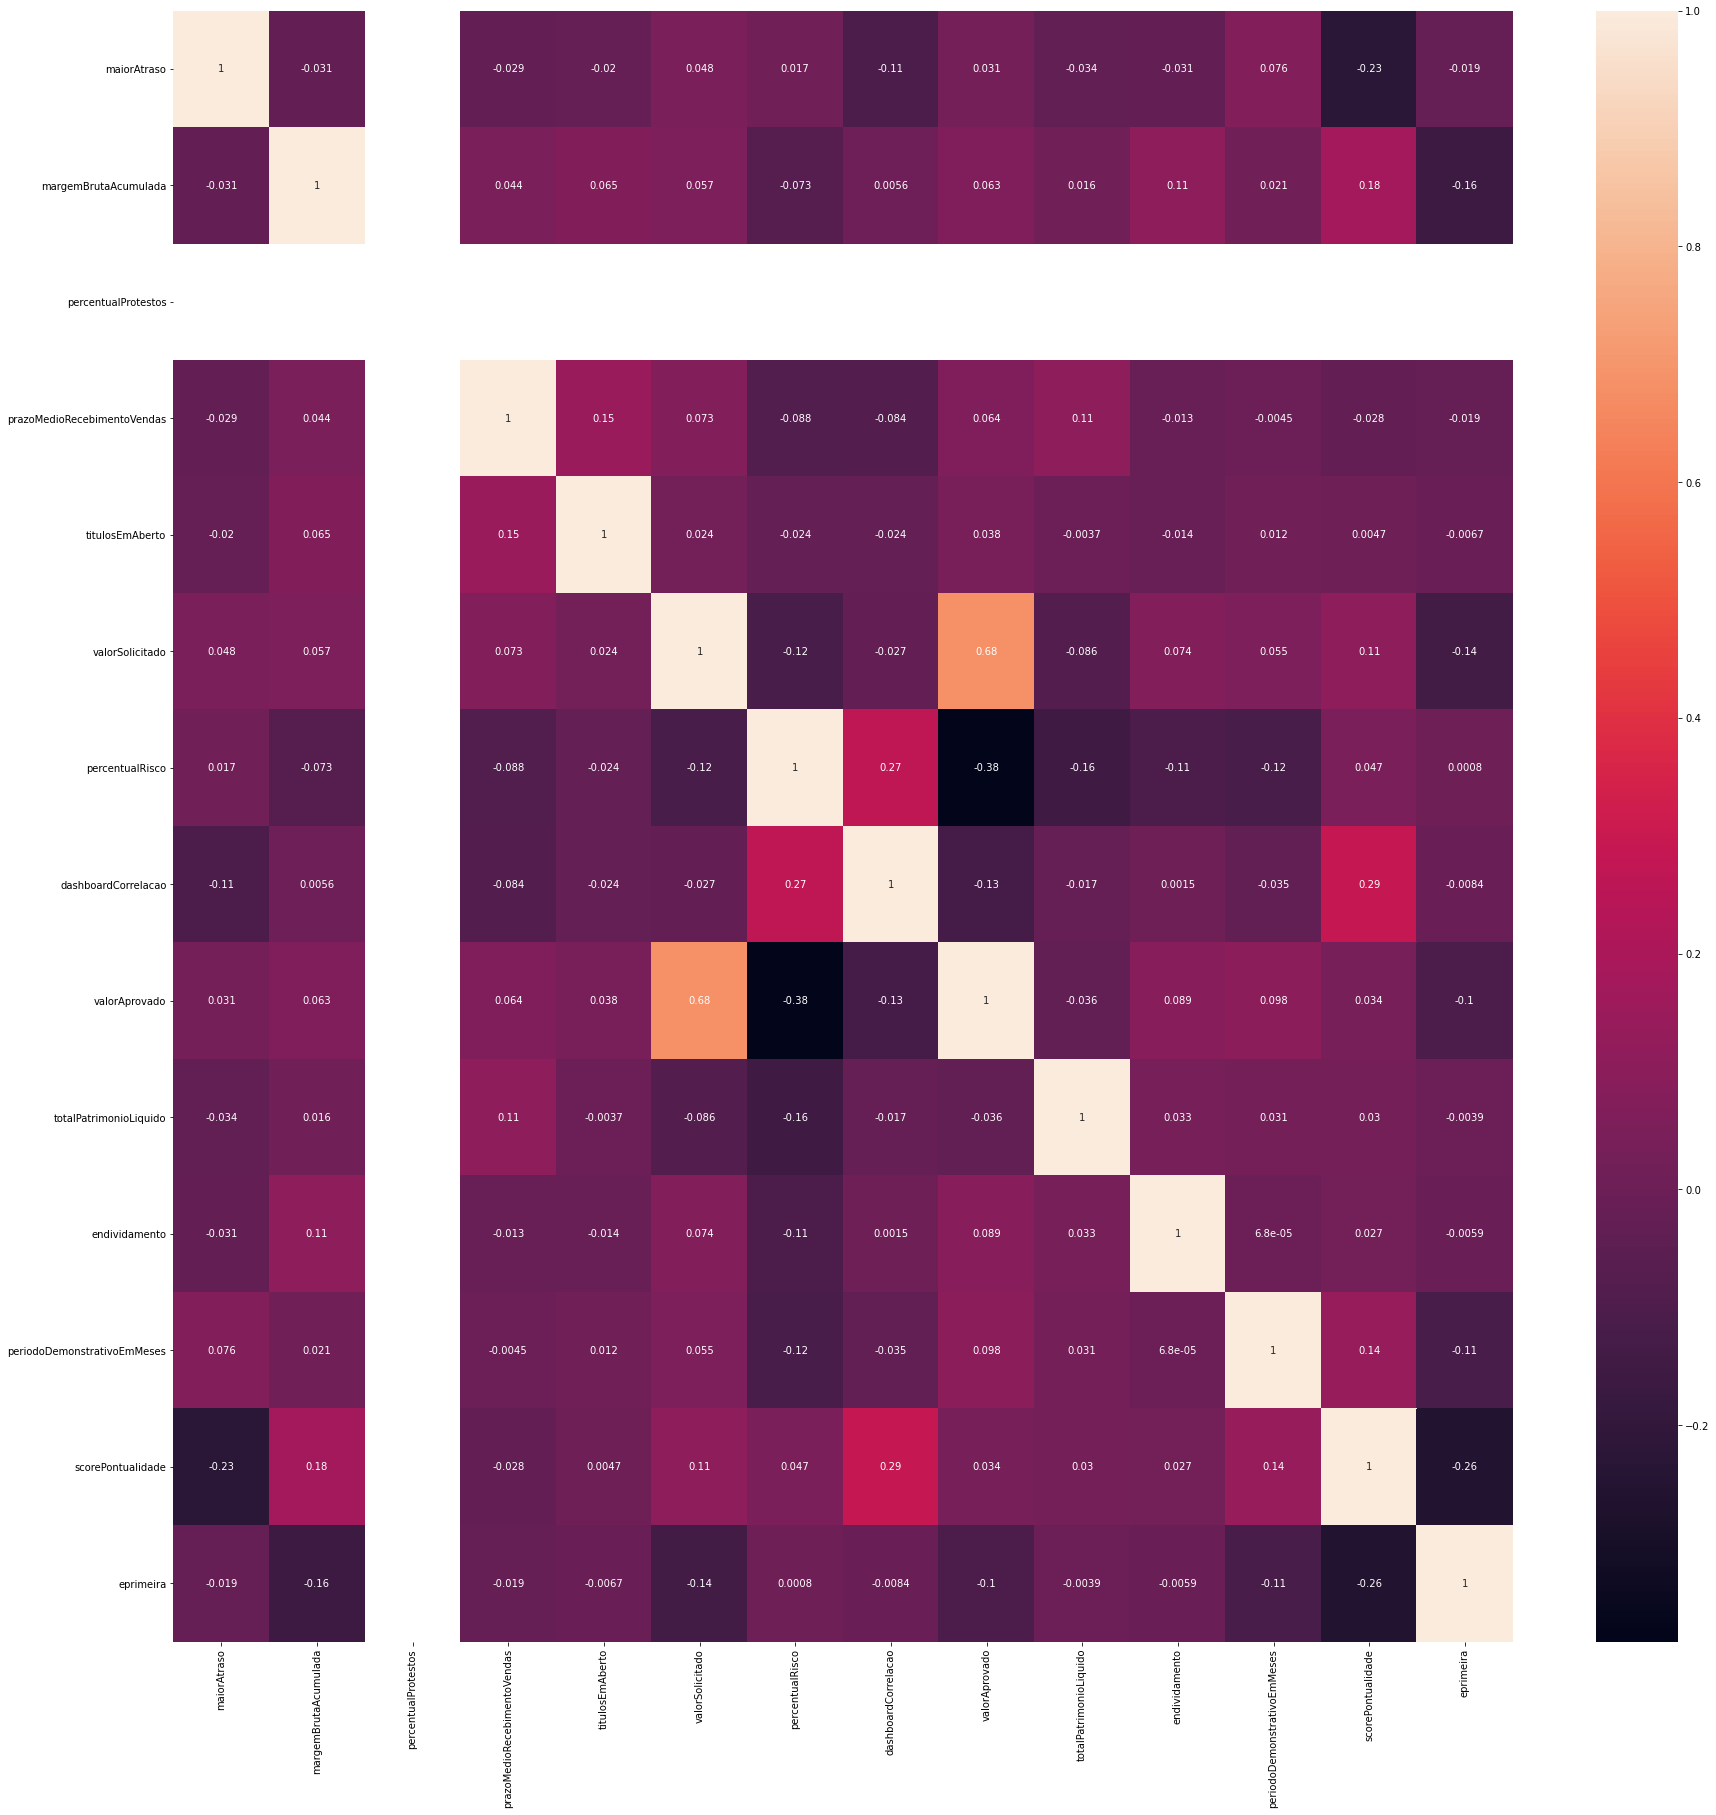

In [28]:
#Remove MultiCollinearity in input
arquivo = pd.read_csv('./solicitacoescredito.csv')
df=arquivo.loc[arquivo['status'].isin(['AprovadoAnalista','AprovadoComite'])]
toDrop= ['numero_solicitacao','razaoSocial','nomeFantasia','cnpjSemTraco','dataAprovadoEmComite','dataAprovadoNivelAnalista','diferencaPercentualRisco','estoque']
df=df.loc[df['valorAprovado']>0]
df=df.loc[df['valorSolicitado']<30000]










df=df.drop(['periodoBalanco'],axis=1)
df=df.drop(['intervaloFundacao'],axis=1)
df=pd.get_dummies(df, columns=["definicaoRisco","empresa_MeEppMei","restricoes","status"], prefix=["definicaoRisco","mei","restricoes","status"])
#Create dummy columns
y = df['valorAprovado'].values
X= df.drop(['valorAprovado'], axis=1).values




LR: -118700463131.070755 (36895136469.512032)
RD: -118462496255.795288 (36779875370.719383)


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5487534675323.859, tolerance: 37647036950.22336
  positive)


LS: -118609539471.683289 (36970882850.759903)
EL: -96557750042.534927 (7680888295.242119)
KNN: -77054222600.794937 (3010094703.802765)
DTR: -21593843489.572994 (2148928241.220232)
RF: -13908523353.039032 (1106623798.880891)
ADA: -21081673239.796154 (317044311.559690)
SVR: -214995172872.568481 (9345585018.006010)
SVR-RBF: -214314807528.146759 (9231717940.284826)
SVR-Linear: -160962310443.803497 (3246050119.080756)
SVR-Poly: -17552477917317.820312 (24525369429710.062500)


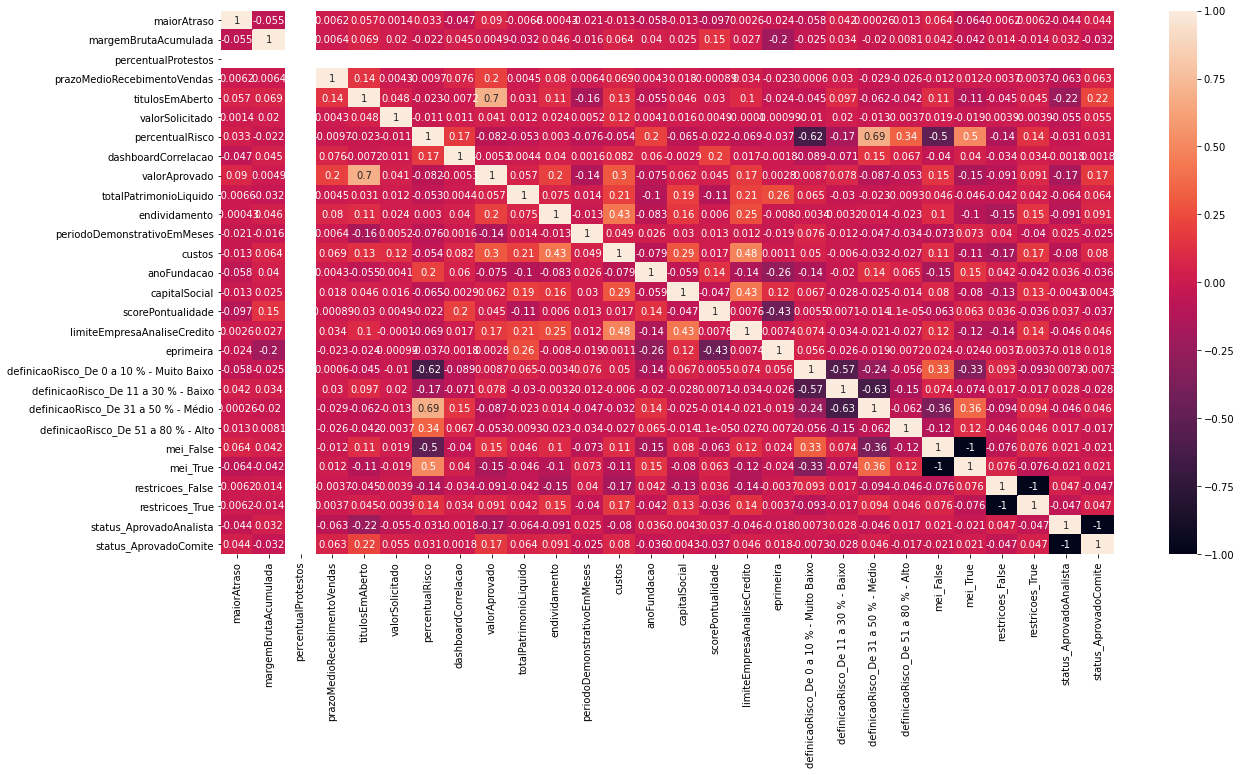

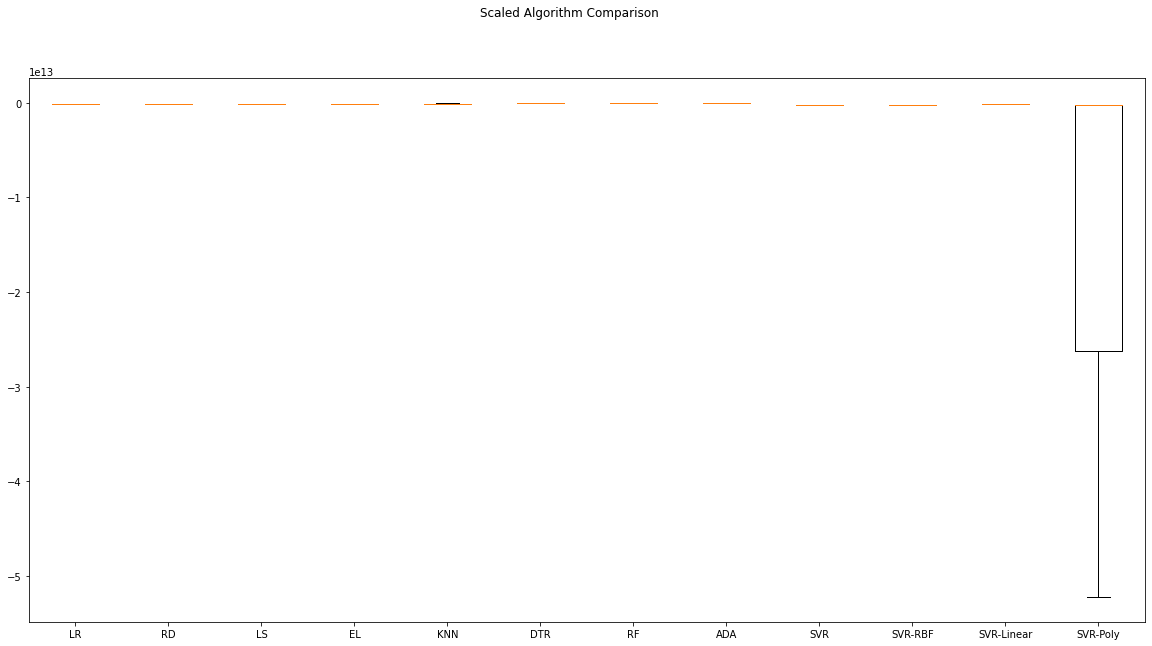

In [13]:
seed=42
test_size = 0.20

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import KFold
import matplotlib.pyplot as pyplot
from pandas import set_option
import seaborn as sb
set_option('precision', 2)
plt.figure(figsize=(20, 10))
corr = df.corr(method='pearson')
sb.heatmap(corr,  annot=True) 



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))

pipelines.append(('RD', Pipeline([('Scaler', StandardScaler()),('RD', Ridge())])))

pipelines.append(('LS', Pipeline([('Scaler', StandardScaler()),('LS', Lasso())])))

pipelines.append(('EL', Pipeline([('Scaler', StandardScaler()),('EL', ElasticNet())])))

pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))

pipelines.append(('DTR', Pipeline([('Scaler', StandardScaler()),('DTR', DecisionTreeRegressor())])))

pipelines.append(('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))

pipelines.append(('ADA', Pipeline([('Scaler', StandardScaler()),('ADA', AdaBoostRegressor())])))

pipelines.append(('SVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
pipelines.append(('SVR-RBF', Pipeline([('Scaler', StandardScaler()),('SVR', SVR(kernel='rbf', C=100, gamma=0.1))])))
pipelines.append(('SVR-Linear', Pipeline([('Scaler', StandardScaler()),('SVR', SVR(kernel='linear', C=100))])))
pipelines.append(('SVR-Poly', Pipeline([('Scaler', StandardScaler()),('SVR', SVR(kernel='poly', C=100, gamma='auto', degree=3))])))
results = []
names = []
num_folds = 3
RMS = 'neg_mean_squared_error'
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=RMS)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Comparando os Algorítimos
fig = pyplot.figure(figsize=(20, 10))
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()
    

In [ ]:
names = ["Nearest Neighbors", 
         "Nearest Neighbors 4",
         "Linear SVM", 
         "RBF SVM",
         "Decission Tree 5",
         "Decision Tree 7", 
         "Random Forest", 
         "Neural Net", 
         "AdaBoost",

        ]

classifiers = [
    KNeighborsRegressor(3),
    KNeighborsRegressor(4),
    SVR(kernel="linear", C=0.025),
    SVR(gamma=2, C=1),
    DecisionTreeRegressor(max_depth=5),
    DecisionTreeRegressor(max_depth=7),
    RandomForestRegressor(max_depth=5, n_estimators=10, max_features=3),
    MLPRegressor(alpha=1, max_iter=1000),
    AdaBoostRegressor(),
    ]
l=len(classifiers)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

list_scores=list()
list_std=list()
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = cross_validate(clf,X,y,n_jobs=2,verbose=0,cv=3,scoring =["neg_mean_squared_error","neg_mean_absolute_percentage_error","neg_mean_absolute_error"])

    print("Regressor {}. Mean Squared Error: {:,.2f}. Mean absolute percentage error: {:,.2f}. Mean Error {:,.2f}".
          format(name,-1*score['test_neg_mean_squared_error'].mean(),
                 -1*score['test_neg_mean_absolute_percentage_error'].mean(),-1*score['test_neg_mean_absolute_error'].mean()))

    
    





Regressor Nearest Neighbors. Mean Squared Error: 111,977,551,031.81. Mean absolute percentage error: 13.31. Mean Error 148,320.57
Regressor Nearest Neighbors 4. Mean Squared Error: 119,313,773,252.83. Mean absolute percentage error: 13.21. Mean Error 157,016.36


In [ ]:

from sklearn.metrics import SCORERS
print(SCORERS.keys())

In [ ]:
newDf.head()

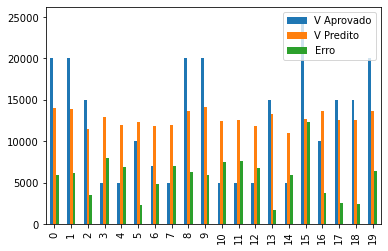

In [29]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
svr_rbf.fit(rescaledX, y_train)

rescaledTestX = scaler.transform(X_test)
predictions = svr_rbf.predict(rescaledTestX)


predictions=predictions.astype(int)
erros = np.absolute( y_test - predictions)
finalresult = pd.DataFrame({
        "V Aprovado": y_test,
        "V Predito": predictions,
        "Erro" : erros
    })

finalresult.head(20).plot(kind='bar')

finalresult.to_csv("predicted2.csv", index=False)

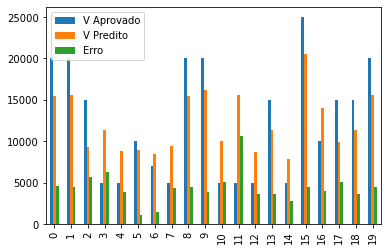

In [30]:


ada = AdaBoostRegressor()
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
ada.fit(rescaledX, y_train)

rescaledTestX = scaler.transform(X_test)
predictions = ada.predict(rescaledTestX)

predictions=predictions.astype(int)
erros = np.absolute( y_test - predictions)
finalresult = pd.DataFrame({
        "V Aprovado": y_test,
        "V Predito": predictions,
        "Erro" : erros
    })

finalresult.head(20).plot(kind='bar')

finalresult.to_csv("predicted2.csv", index=False)

In [31]:

from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
#necessita do pydot pip install pydot
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, mean_squared_error
import tensorflow_probability as tfp




seed=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

qtd_features = len(X_train[0,:])
qtd_features
model = Sequential()
model.add(Dense(1024, input_dim=qtd_features, activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(1))
# Usa a função de perda mse (mean square error) e monitora o mae (mean absolute erro) e mse (mean square error)
model.compile(loss='mse',optimizer='adamax', metrics=['mae', 'mse'])

callbacks= [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='models/model.{epoch:02d}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

model.fit(X_train, y_train, epochs=200, batch_size=4,callbacks=callbacks)

y_pred = model.predict(X_test)








Epoch 1/200
96/96 [==============================] - 1s 8ms/step - loss: 210812938.0619 - mae: 13282.1072 - mse: 210812938.0619
Epoch 2/200
96/96 [==============================] - 1s 7ms/step - loss: 88266578.3093 - mae: 7783.9629 - mse: 88266578.3093
Epoch 3/200
96/96 [==============================] - 1s 7ms/step - loss: 31955824.3299 - mae: 4825.3407 - mse: 31955824.3299
Epoch 4/200
96/96 [==============================] - 1s 7ms/step - loss: 29590195.3918 - mae: 4490.1152 - mse: 29590195.3918
Epoch 5/200
96/96 [==============================] - 1s 7ms/step - loss: 30722446.1856 - mae: 4687.5928 - mse: 30722446.1856
Epoch 6/200
96/96 [==============================] - 1s 7ms/step - loss: 29015539.9072 - mae: 4531.4650 - mse: 29015539.9072
Epoch 7/200
96/96 [==============================] - 1s 8ms/step - loss: 27632116.3402 - mae: 4434.8168 - mse: 27632116.3402
Epoch 8/200
96/96 [==============================] - 1s 8ms/step - loss: 26426088.3299 - mae: 4340.7017 - mse: 26426088.32

<AxesSubplot:>

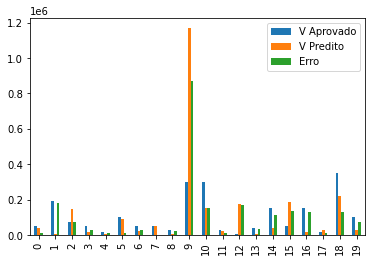

In [26]:
y_pred = model.predict(X_test)
predictions=y_pred[:,0]
predictions=predictions.astype(int)
erros = np.absolute( y_test - predictions)
finalresult = pd.DataFrame({
        "V Aprovado": y_test,
        "V Predito": predictions,
        "Erro" : erros
    })

finalresult.head(20).plot(kind='bar')


In [32]:
print(median_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

2479.92919921875
23458932.770895626


<AxesSubplot:>

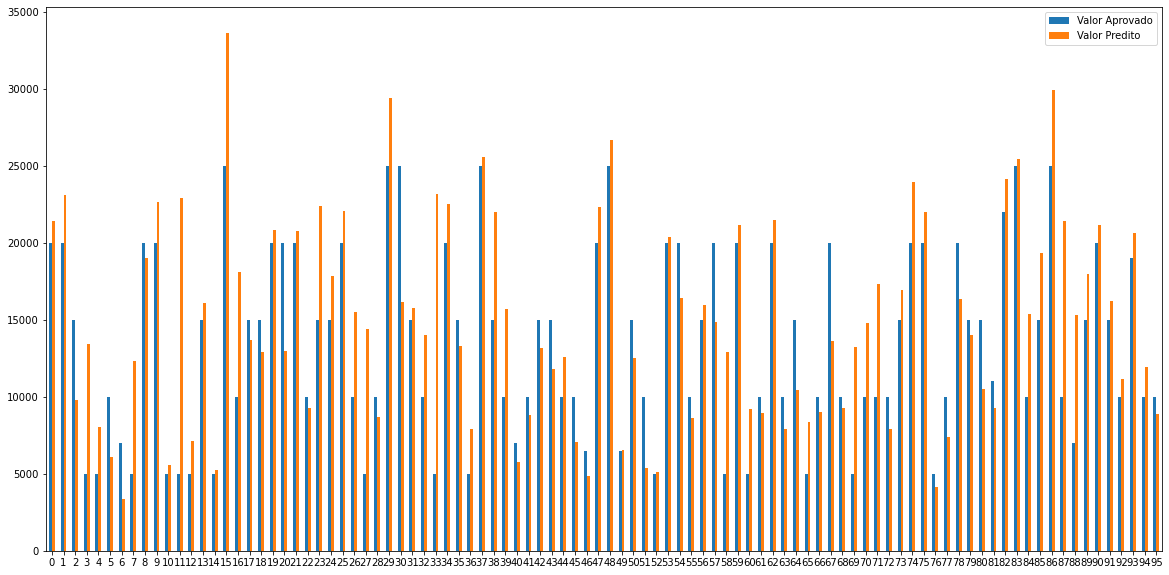

In [33]:
dfresult = pd.DataFrame({
        "Valor Aprovado": y_test,
        "Valor Predito": y_pred[:,0]
    })
dfresult.plot.bar(rot=0, figsize = (20,10))